# 금융데이터 불러오기

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
!pip install -U finance-datareader
import FinanceDataReader as fdr
df_krx=fdr.StockListing('KRX')
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7126 entries, 0 to 7125
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7126 non-null   object        
 1   Market          7126 non-null   object        
 2   Name            7126 non-null   object        
 3   Sector          2451 non-null   object        
 4   Industry        2432 non-null   object        
 5   ListingDate     2451 non-null   datetime64[ns]
 6   SettleMonth     2451 non-null   object        
 7   Representative  2451 non-null   object        
 8   HomePage        2268 non-null   object        
 9   Region          2451 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 612.4+ KB


## 코스피, 코스닥 상장 주식 가져오기

In [ ]:
df_krx=df_krx[df_krx['ListingDate'].notna()] #ListingDate
df_krx=df_krx[df_krx['Market']!='KONEX'] #비상장주식(Konex)제외
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 7125
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          2314 non-null   object        
 1   Market          2314 non-null   object        
 2   Name            2314 non-null   object        
 3   Sector          2314 non-null   object        
 4   Industry        2297 non-null   object        
 5   ListingDate     2314 non-null   datetime64[ns]
 6   SettleMonth     2314 non-null   object        
 7   Representative  2314 non-null   object        
 8   HomePage        2134 non-null   object        
 9   Region          2314 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 198.9+ KB


In [ ]:
#주가_종가, 거래량 가져오기 df_stock (2021년 상반기 데이터)
import pandas as pd
start = '2021-01-01'
end = '2021-06-30'
df_stock=pd.DataFrame(fdr.DataReader('KS11', start, end)[['Close','Volume']])
df_stock.columns=['KOSPI_Close','KOSPI_Volume']
tmp=pd.DataFrame(fdr.DataReader('KQ11', start, end)[['Close','Volume']])
tmp.columns=['KOSDAK_Close','KOSDAK_Volume']
df_stock=pd.concat([df_stock,tmp], axis=1)
for i in df_krx['Symbol']:
  tmp = pd.DataFrame(fdr.DataReader(i,start,end)[['Close','Volume']])
  tmp.columns=[str(df_krx[df_krx['Symbol']==i].iloc[0,2])+str('_Close'),str(df_krx[df_krx['Symbol']==i].iloc[0,2])+str('_Volume')]
  df_stock = pd.concat([df_stock,tmp],axis=1)

In [ ]:
#종가 데이터만 가져오기
df_stock_close=df_stock.filter(regex='Close')
df_stock_close.head(6)

,KOSPI_Close,KOSDAK_Close,3S_Close,AJ네트웍스_Close,AK홀딩스_Close,APS홀딩스_Close,AP시스템_Close,AP위성_Close,BGF_Close,BGF리테일_Close,BNK금융지주_Close,BYC_Close,CBI_Close,CJ_Close,CJ CGV_Close,CJ ENM_Close,CJ대한통운_Close,CJ씨푸드_Close,CJ제일제당_Close,CJ프레시웨이_Close,CMG제약_Close,CNH_Close,COWON_Close,CS_Close,CSA 코스믹_Close,CS홀딩스_Close,DB_Close,DB금융스팩8호_Close,DB금융스팩9호_Close,DB금융투자_Close,DB손해보험_Close,DB하이텍_Close,DGB금융지주_Close,DI동일_Close,DL_Close,DL건설_Close,DL이앤씨_Close,DMS_Close,DRB동일_Close,DSC인베스트먼트_Close,...,화신정공_Close,화인베스틸_Close,화일약품_Close,화천기계_Close,화천기공_Close,환인제약_Close,황금에스티_Close,효성_Close,효성ITX_Close,효성오앤비_Close,효성중공업_Close,효성첨단소재_Close,효성티앤씨_Close,효성화학_Close,후성_Close,휘닉스소재_Close,휠라홀딩스_Close,휴네시온_Close,휴니드_Close,휴림로봇_Close,휴마시스_Close,휴맥스_Close,휴맥스홀딩스_Close,휴먼엔_Close,휴메딕스_Close,휴비스_Close,휴비츠_Close,휴스틸_Close,휴온스_Close,휴온스글로벌_Close,휴온스블러썸_Close,휴젤_Close,휴켐스_Close,흥구석유_Close,흥국_Close,흥국에프엔비_Close,흥국화재_Close,흥아해운_Close,희림_Close,힘스_Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,2944.45,977.62,2260,4580,25250,8000,25500,8330,4990,132000,5560,287500,9490,92100,26200,141800,168500,5070,384500,18900,5810,2280,2860,2460,2195,59100,831,2010,NaN,4675,42750,51100,6660,155500,75000,31200,NaN,9100,6930,3993,...,1850,2715,4150,2640,32150,16550,7027,75400,22800,7740,63600,151000,213000,159500,12350,1240,42850,5610,5820,1675,9050,5425,4530,9810,23600,8170,7500,7300,59800,29100,4555,190000,26600,7320,5830,2005,2790,258,3940,13050
2021-01-05,2990.57,985.76,2250,4935,25050,7900,25150,8160,5030,134500,5580,291000,9360,94000,26000,147600,177000,5120,414500,19100,5870,2385,2860,2395,2135,59700,829,2020,NaN,4720,42950,49900,6780,165000,75000,32300,NaN,8910,6870,3879,...,1755,2800,4100,2655,32050,16500,7263,76400,22600,7740,65000,152500,211500,161500,12150,1180,44700,5640,5920,1640,9100,5471,4455,11400,23550,8220,7450,7510,60000,28750,4555,190400,25950,7290,5800,1980,2775,258,3910,12900
2021-01-06,2968.21,981.39,2290,4710,24900,7670,25500,8190,4970,134000,5570,302500,9990,94100,26000,146500,172000,5080,403500,18900,6040,2400,2860,2410,2145,59300,835,2020,NaN,5260,42600,53600,6800,166500,75000,33400,NaN,8740,6940,3900,...,1900,2785,4267,2680,31700,16650,7622,76300,21900,7790,64400,153500,210000,166500,11750,1175,44350,5560,6030,1590,9030,5415,4455,12050,24100,8200,7690,7570,60700,28750,4555,190300,25250,7330,5700,2015,2830,258,3925,13100
2021-01-07,3031.68,988.86,2290,4695,25200,7650,26100,8350,4930,136500,5780,314000,9750,94900,25850,147700,174500,5090,405000,19950,6090,2405,2860,2390,2150,59900,860,2020,NaN,5360,43650,54000,7200,178500,75000,36500,NaN,8880,7010,3879,...,2010,2790,4183,2665,32350,16600,7788,77100,21850,7800,67100,160000,224000,180000,12200,1170,45100,5580,5940,1690,9030,5517,4460,12300,23800,8240,7660,7790,60500,29200,4555,197800,26100,7550,5910,2050,2995,258,3950,13100
2021-01-08,3152.18,987.79,2245,4540,25350,7500,26000,8100,4905,141000,5780,324500,9770,102500,26150,156200,173000,5010,432500,20100,5880,2375,2860,2315,2135,60400,845,2020,NaN,5420,43800,54900,7230,178000,75000,36600,NaN,8890,7260,3900,...,1970,2770,4017,2645,32900,16750,7701,79500,21500,7840,71300,162000,226500,182500,12000,1165,44450,5730,5980,1645,8820,5425,4370,12900,23450,8190,7620,7680,59400,28850,4555,198000,26000,7510,5910,2010,3000,258,3935,12950
2021-01-11,3148.45,976.63,2175,4360,24800,7200,25000,7900,4690,135500,5720,313500,9680,98500,26150,159900,170000,4855,424000,19950,5780,2380,2860,2280,2035,61700,840,2015,NaN,5730,42750,56200,7020,169000,75000,37400,NaN,8680,7290,3672,...,2075,2715,3883,2560,32800,17300,7526,77600,21000,7630,67700,156000,215000,177000,11600,1100,45850,5510,6020,1525,8220,5831,4445,12200,22350,8000,7570,7320,57200,27750,4555,197700,24850,7270,6370,1935,2970,258,3905,13050


## 월수익 가장 큰 5개기업 가져오기

In [ ]:
df_m = df_stock_close.resample('M').last().pct_change()#Y, M, 2W, W, D
df_m

,KOSPI_Close,KOSDAK_Close,3S_Close,AJ네트웍스_Close,AK홀딩스_Close,APS홀딩스_Close,AP시스템_Close,AP위성_Close,BGF_Close,BGF리테일_Close,BNK금융지주_Close,BYC_Close,CBI_Close,CJ_Close,CJ CGV_Close,CJ ENM_Close,CJ대한통운_Close,CJ씨푸드_Close,CJ제일제당_Close,CJ프레시웨이_Close,CMG제약_Close,CNH_Close,COWON_Close,CS_Close,CSA 코스믹_Close,CS홀딩스_Close,DB_Close,DB금융스팩8호_Close,DB금융스팩9호_Close,DB금융투자_Close,DB손해보험_Close,DB하이텍_Close,DGB금융지주_Close,DI동일_Close,DL_Close,DL건설_Close,DL이앤씨_Close,DMS_Close,DRB동일_Close,DSC인베스트먼트_Close,...,화신정공_Close,화인베스틸_Close,화일약품_Close,화천기계_Close,화천기공_Close,환인제약_Close,황금에스티_Close,효성_Close,효성ITX_Close,효성오앤비_Close,효성중공업_Close,효성첨단소재_Close,효성티앤씨_Close,효성화학_Close,후성_Close,휘닉스소재_Close,휠라홀딩스_Close,휴네시온_Close,휴니드_Close,휴림로봇_Close,휴마시스_Close,휴맥스_Close,휴맥스홀딩스_Close,휴먼엔_Close,휴메딕스_Close,휴비스_Close,휴비츠_Close,휴스틸_Close,휴온스_Close,휴온스글로벌_Close,휴온스블러썸_Close,휴젤_Close,휴켐스_Close,흥구석유_Close,흥국_Close,흥국에프엔비_Close,흥국화재_Close,흥아해운_Close,희림_Close,힘스_Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-28,0.012345,-0.015925,0.074661,-0.031172,0.079447,0.070735,0.158111,0.751174,-0.201742,-0.064706,0.070780,0.287456,0.360577,-0.014878,0.042831,-0.095487,-0.023810,-0.048405,-0.045775,0.054054,-0.118236,0.036072,0.0,-0.044776,0.260128,0.015762,0.016355,0.014706,NaN,0.203782,0.125000,-0.082927,0.109890,-0.166667,0.418033,-0.116547,-0.004484,0.003571,0.002882,0.066701,...,-0.006079,-0.008264,0.031169,0.013043,-0.011111,0.040872,0.156263,0.079515,-0.034146,-0.027329,0.082212,0.291391,0.372287,0.372727,-0.154812,-0.125532,-0.063232,0.061224,0.014778,-0.116788,-0.163352,-0.130067,-0.020270,0.000000,0.118357,0.049351,0.086111,0.189008,0.001802,0.028249,0.0,-0.121553,0.070093,0.233438,0.000000,0.252700,0.365354,0.0,-0.019744,0.065637
2021-03-31,0.016087,0.046207,0.008421,0.159588,-0.145600,0.256477,0.015957,-0.158177,0.274545,-0.006289,0.150847,-0.064953,-0.028269,0.014024,0.001786,0.028923,0.115854,0.104046,0.011070,0.139860,-0.003409,0.056093,0.0,0.070312,-0.353638,0.108621,0.001149,0.004831,NaN,0.055846,0.142512,-0.001773,0.193777,0.039394,0.011561,0.136808,0.085586,0.005931,-0.028736,0.425791,...,0.351682,0.097917,0.163636,0.100858,0.112360,-0.057592,0.057443,0.109863,0.020202,0.057471,0.082873,0.300855,0.394161,0.364238,0.039604,0.654501,0.078750,0.078671,0.393204,-0.103306,0.147708,0.070022,0.048276,-0.045455,0.053996,0.092822,0.075448,0.234498,0.008993,0.128205,0.0,0.037791,-0.048035,-0.072890,0.324022,0.868966,-0.053057,0.0,0.126777,-0.050725
2021-04-30,0.028235,0.028530,0.183716,0.234184,0.164794,0.242268,-0.012216,-0.111465,-0.014265,-0.031646,0.129602,0.047757,0.556364,0.015957,-0.069519,0.011947,-0.062842,-0.077487,-0.037713,-0.020450,-0.006842,0.309524,0.0,1.372263,0.282723,0.164852,0.067738,0.031250,0.022005,0.173554,0.034884,-0.017762,0.049763,0.061224,0.081143,0.017192,0.103734,0.011792,0.041420,0.017065,...,-0.149321,0.267552,-0.110352,0.033138,0.122655,0.163889,0.125000,0.118110,-0.024752,0.044686,-0.105867,0.006570,0.261780,0.310680,-0.019048,-0.069853,0.056779,-0.042139,-0.022067,0.059908,2.631657,0.054960,0.018421,0.109524,0.592213,0.194790,0.065398,0.484018,0.347594,1.405844,0.0,0.033613,-0.002294,0.059310,-0.064346,-0.221402,0.088916,0.0,0.735016,0.003817
2021-05-31,0.017809,-0.001698,0.019400,0.064748,0.138264,0.211618,0.028269,0.096774,0.015919,0.186275,0.036506,0.197514,0.429907,0.198953,0.281609,0.147917,-0.008746,0.070375,0.235145,0.361169,0.065442,-0.018182,0.0,-0.146154,-0.248980,-0.004005,0.086022,0.139860,0.363636,0.009859,0.035751,-0.066908,0.067720,-0.016484,-0.132135,0.022535,0.011278,-0.079254,0.019886,0.011745,...,0.154255,-0.218563,-0.115258,0.073585,-0.034704,0.045346,-0

In [ ]:
import numpy as np
n=5
best_stock=df_m.mean().sort_values(ascending=False)[0:n].index.to_list()
df=df_stock_close[best_stock]
df

,쎄미시스코_Close,NE능률_Close,덕성_Close,이스타코_Close,휴마시스_Close
Date,,,,,
2021-01-04,7680,2780,8100,678,9050
2021-01-05,7580,2840,7940,685,9100
2021-01-06,7570,2830,8350,685,9030
2021-01-07,7550,2830,8630,701,9030
2021-01-08,7660,2790,8360,699,8820
...,...,...,...,...,...
2021-06-24,38550,26500,27200,4600,18700
2021-06-25,41200,26150,26800,5130,19100
2021-06-28,41500,26700,26900,5990,18400


## 포트폴리오 구성



- 위의 최대수익 5개 기업으로 포트폴리오 구성

In [ ]:
#title 주식별 (월)수익, 위험, 공분산 구하기
# Yearly returns for individual companies
ind_er=df.resample('m').last().pct_change().mean()
# Volatility 
ann_sd=df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(df.shape[0]))
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
쎄미시스코_Close,0.748925,0.762761
NE능률_Close,0.722106,0.840783
덕성_Close,0.567284,0.766418
이스타코_Close,0.565495,0.865522
휴마시스_Close,0.515763,0.752524


- 포트폴리오 수익,위험,가중치 데이터

In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,쎄미시스코_Close weight,NE능률_Close weight,덕성_Close weight,이스타코_Close weight,휴마시스_Close weight
0,0.615378,0.638587,0.126107,0.247531,0.250069,0.125713,0.250580
1,0.601816,0.623814,0.091469,0.201098,0.181795,0.278776,0.246862
2,0.615788,0.627985,0.316066,0.043742,0.306105,0.030833,0.303253
3,0.630856,0.600670,0.220392,0.223837,0.199616,0.145468,0.210687
4,0.607552,0.617079,0.264344,0.082180,0.199892,0.058270,0.395315


In [ ]:
#Minimum volatility (left most point)
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns               0.618336
Volatility            0.571730
쎄미시스코_Close weight    0.275204
NE능률_Close weight     0.088683
덕성_Close weight       0.175911
이스타코_Close weight     0.222075
휴마시스_Close weight     0.238128
Name: 1379, dtype: float64

In [ ]:
# Finding the optimal portfolio
#Optimal Risky Portfolio
#An optimal risky portfolio can be considered as one that has highest Sharpe ratio.
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns               0.643012
Volatility            0.583791
쎄미시스코_Close weight    0.326937
NE능률_Close weight     0.176731
덕성_Close weight       0.100403
이스타코_Close weight     0.188612
휴마시스_Close weight     0.207317
Name: 9935, dtype: float64

In [ ]:
import warnings
warnings.filterwarnings("ignore")

- 포트폴리오 투자선 및 최적포트폴리오 위치

Text(0.7525243396784821, 0.5157633341413592, 'Humasis_Close')

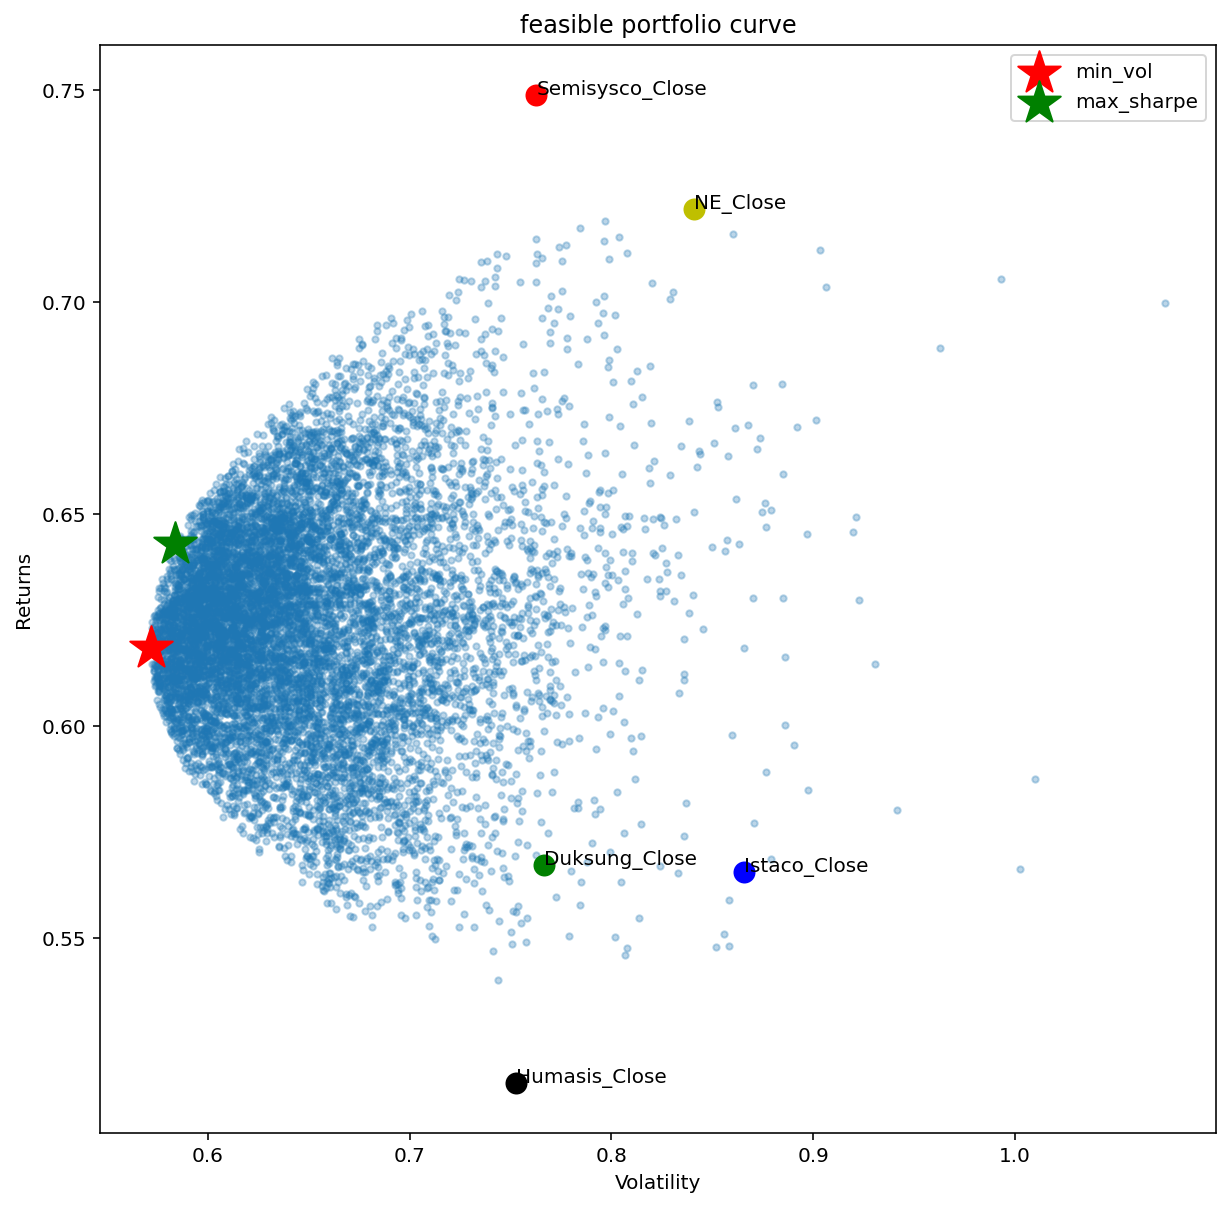

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
a = plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500 )
b = plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500) 
plt.scatter(assets.iloc[0,1],assets.iloc[0,0],color='r',s=100) # 쎄미시스코_Close
plt.scatter(assets.iloc[1,1],assets.iloc[1,0],color='y',s=100) # NE능률_Close
plt.scatter(assets.iloc[2,1],assets.iloc[2,0],color='g',s=100) # 덕성_Close
plt.scatter(assets.iloc[3,1],assets.iloc[3,0],color='b',s=100) # 이스타코_Close
plt.scatter(assets.iloc[4,1],assets.iloc[4,0],color='k',s=100) # 휴마시스_Close
plt.title("feasible portfolio curve")
plt.xlabel("Volatility")
plt.ylabel("Returns") 
plt.legend((a,b),('min_vol','max_sharpe'))
plt.text(assets.iloc[0,1],assets.iloc[0,0],'Semisysco_Close')
plt.text(assets.iloc[1,1],assets.iloc[1,0],'NE_Close')
plt.text(assets.iloc[2,1],assets.iloc[2,0],'Duksung_Close')
plt.text(assets.iloc[3,1],assets.iloc[3,0],'Istaco_Close')
plt.text(assets.iloc[4,1],assets.iloc[4,0],'Humasis_Close')

- 수익률 높은 주식과 상관관계 높은 기업

In [ ]:
df_corr=df_stock_close.corr()
target_feature=df.columns[0] #수익 최대 기업 - 쎄미시스코
cor_target=abs(df_corr[target_feature]) #Selecting highly correlated features
df_corr[target_feature][cor_target[cor_target>0.7].index.values.tolist()]

CJ ENM_Close     0.759498
CJ프레시웨이_Close    0.797159
DB_Close         0.766417
DRB동일_Close      0.851986
E1_Close         0.755617
                   ...   
화승코퍼레이션_Close    0.784216
화신_Close         0.849889
화신정공_Close       0.723099
휴먼엔_Close       -0.707547
휴젤_Close         0.830951
Name: 쎄미시스코_Close, Length: 304, dtype: float64

## 시간도표,거래량,이동평균선

- 거래량과 주가 상승/하락 관계
- 주가가 바닥에 있을 때 거래량 상승 / "주가가 천장일때 거래량이               급증한다-주가하락가능성 농후"
```
1) 주가 하락 + 거래량 증가 => 위험
2) 주가 하락 + 거래량 감소 => 판단, 악재가 없다면 사자
3) 주가 상승 + 거래량 증가 => 사는 시점
4) 주가 상승 + 거래량 감소 => 위험
```



In [ ]:
 !pip install --upgrade mplfinance

     |████████████████████████████████| 71kB 3.8MB/s 


In [ ]:
df.columns[0] #최대 수익 사업체명

'쎄미시스코_Close'

In [ ]:
#주식종목 코드 찾기
name=input(" 주식 코드 기업명" ) #find 종목코드 및 정보
df_krx[df_krx['Name'].str.contains(name)]

 주식 코드 기업명쎄미시스코


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4038,136510,KOSDAQ,쎄미시스코,특수 목적용 기계 제조업,"EGIS(유리기판 검사장비), Smart-EPD 및 Smart-HMS(플라즈마 검사장비)",2011-11-18,12월,이순종,http://www.semisysco.com,경기도


In [ ]:
#주가 데이터 가져오기 함수
df_top=fdr.DataReader('136510','2021-01-01','2021-06-30')  #최대 수익 주식 데이터 가져오기

## 골든크로스/데드크로스

In [ ]:
df=df_top['Close']
import pandas as pd
df_ma_s=df.rolling(window=50).mean()
df_ma_L=df.rolling(window=200).mean()
df_all=pd.concat([df_ma_s, df_ma_L], axis=1)
df_all.columns=['ma50','ma200']
df_all['ma50_diff']=df_all['ma50'].diff()
df_all['ma200_diff']=df_all['ma200'].diff()
df_all.dropna(inplace=True)
#Golden Cross
for k in range(0,df_all.shape[0]):
  if (df_all.ma50_diff[k]>0) & (df_all.ma50_diff[k-1]>0) & (df_all.ma50_diff[k]>df_all.ma50_diff[k-1]) & (df_all.ma200_diff[k]>0) & (df_all.ma200_diff[k-1]>0) & (df_all.ma200_diff[k]>df_all.ma200_diff[k-1]):
    if (df_all.ma50[k-1]<df_all.ma200[k-1]) & (df_all.ma50[k]>df_all.ma200[k]):
      print('Golden Cross happens on',df_all.index[k])
#Dead Cross
for k in range(0,df_all.shape[0]):
  if (df_all.ma50_diff[k]<0) & (df_all.ma50_diff[k-1]<0) & (df_all.ma50_diff[k]<df_all.ma50_diff[k-1]) & (df_all.ma200_diff[k]<0) & (df_all.ma200_diff[k-1]<0) & (df_all.ma200_diff[k]<df_all.ma200_diff[k-1]):
    if (df_all.ma50[k-1]>df_all.ma200[k-1]) & (df_all.ma50[k]<df_all.ma200[k]):
      print('Dead Cross happens on',df_all.index[k])

## 월별 주가 나무상자그림

In [ ]:
df=df_top
df['year']=df.index.year.astype(str)
df['month']=df.index.month
df['weekday']=df.index.dayofweek

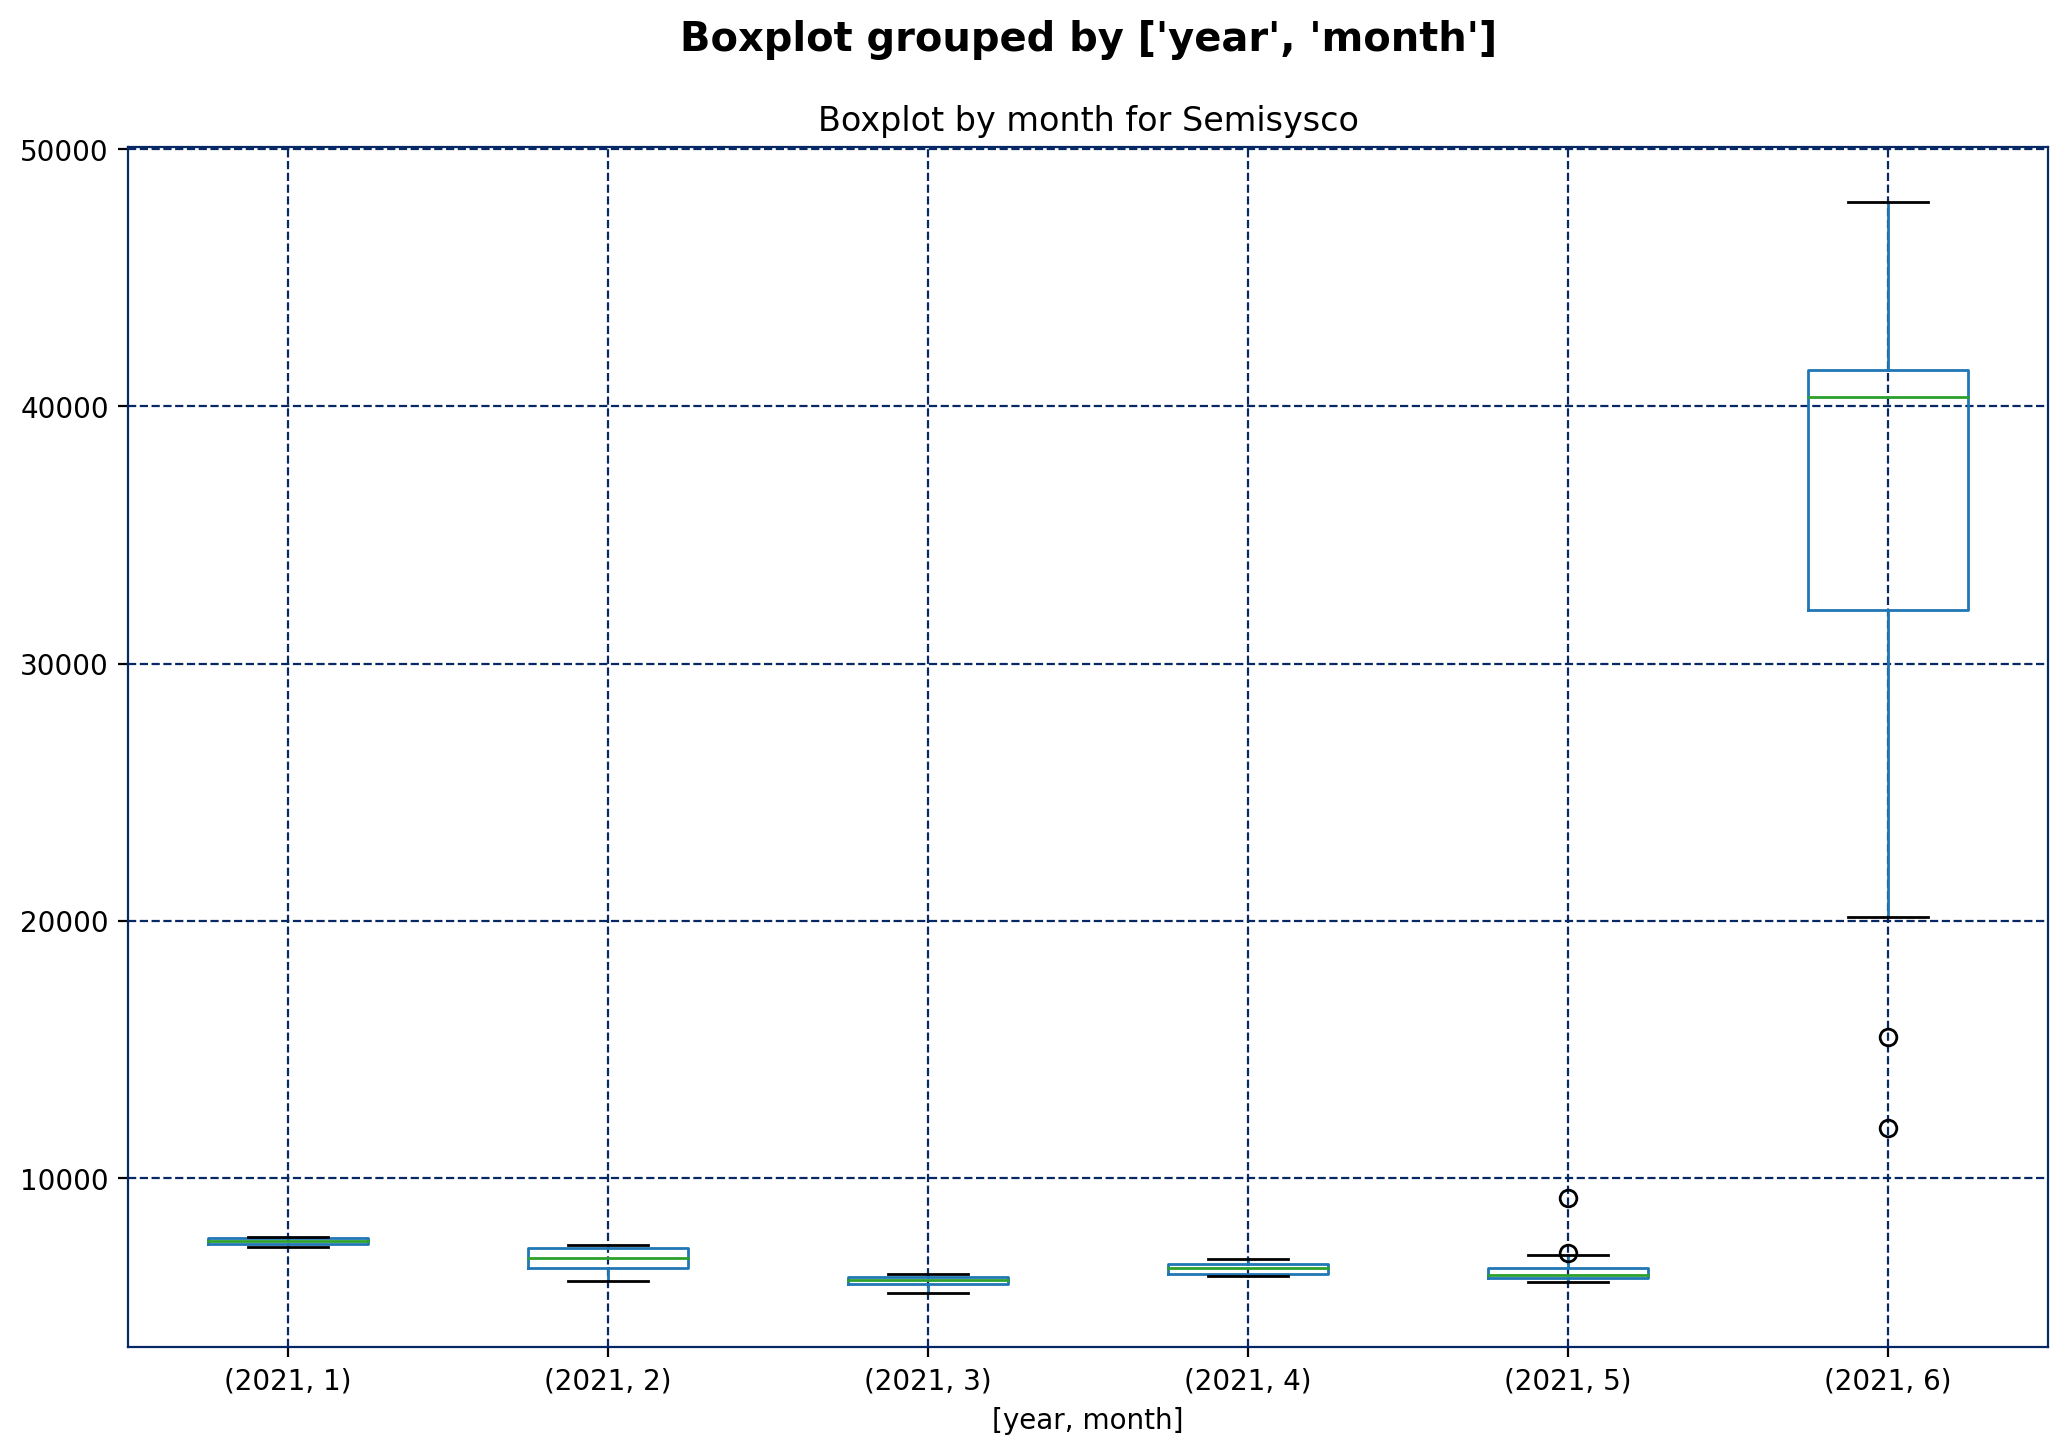

In [ ]:
df.boxplot(column=['Close'], by=['year','month'],figsize=(12,8))
plt.title('Boxplot by month for Semisysco')
plt.show()

## 볼린저밴드

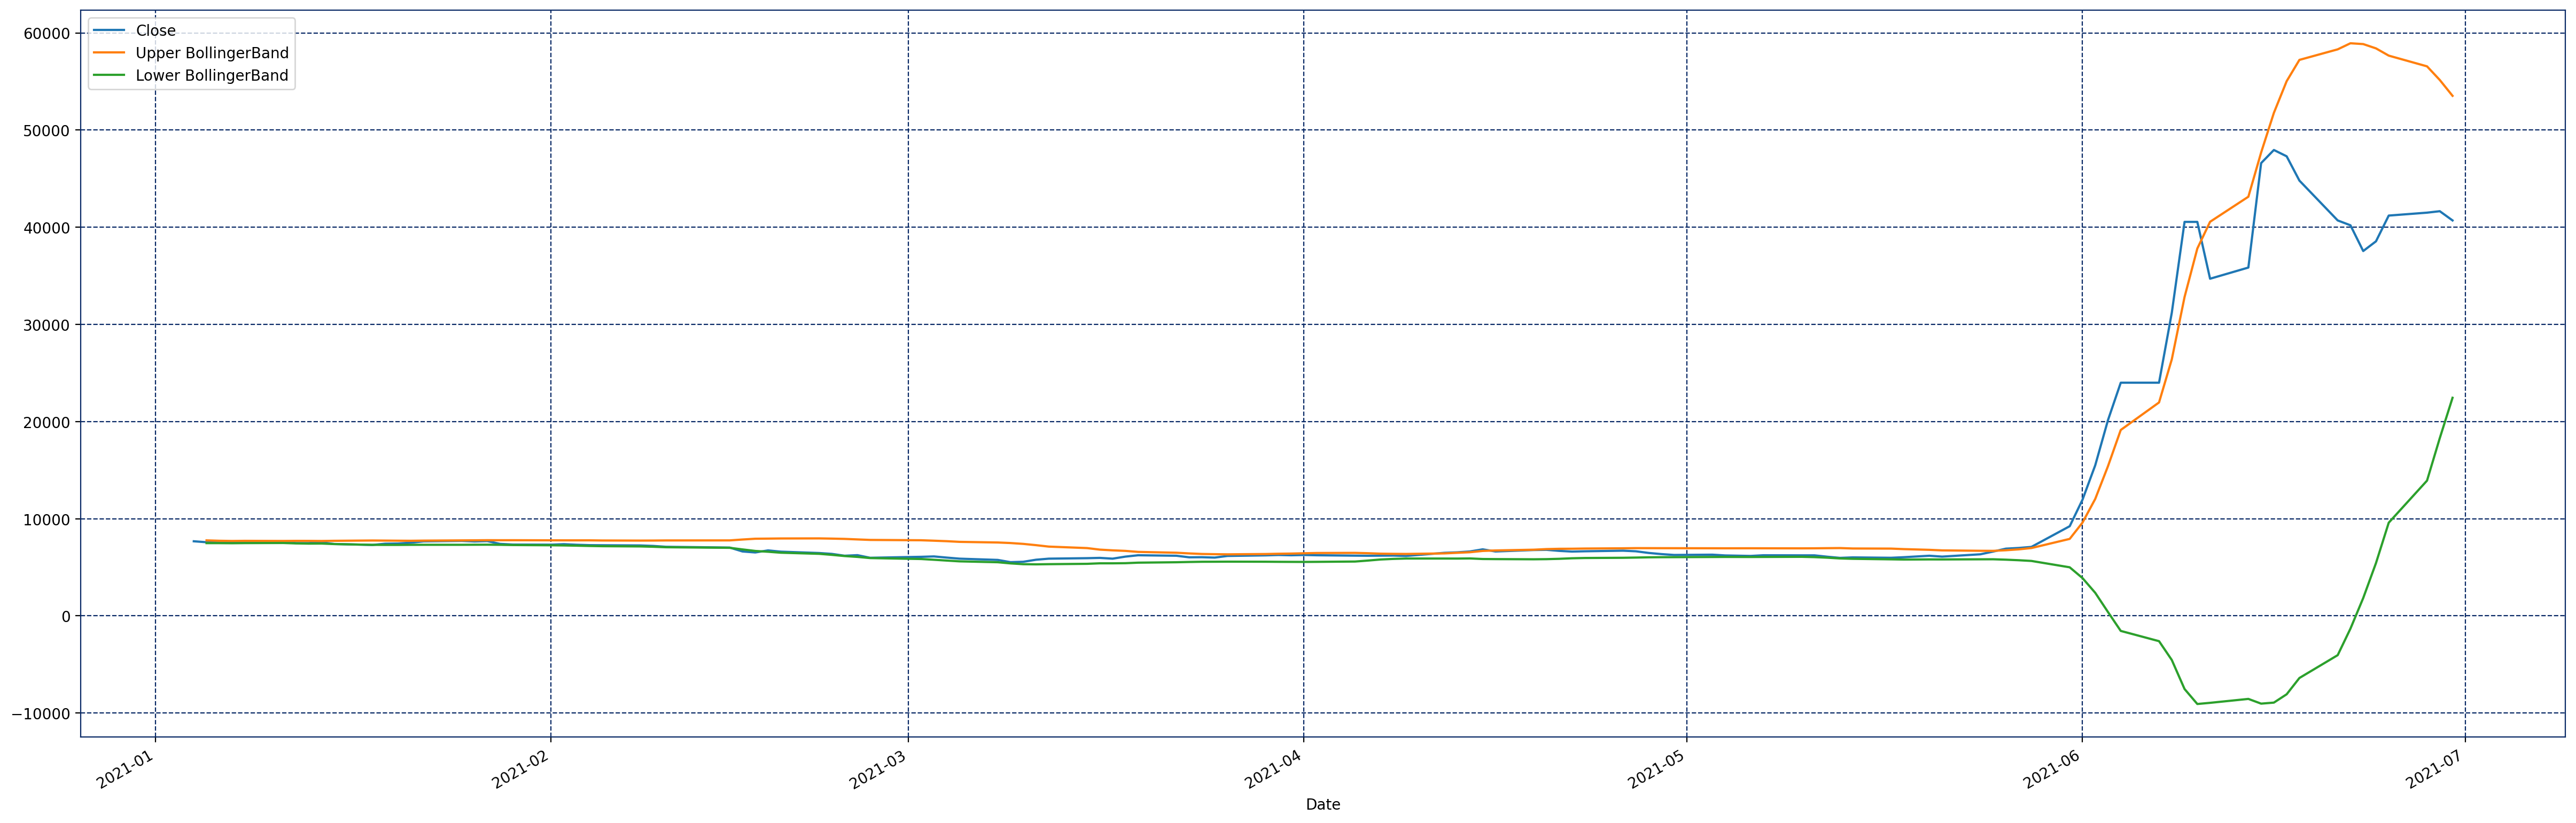

In [ ]:
w_size = 20
k = 2
df['Moving Average']      = df['Close'].rolling(window=w_size, min_periods=1).mean()
df['Standard Deviation']  = df['Close'].rolling(window=w_size, min_periods=1).std()
df['Upper BollingerBand'] = df['Moving Average'] + (df['Standard Deviation'] * k)
df['Lower BollingerBand'] = df['Moving Average'] - (df['Standard Deviation'] * k)
df[['Close', 'Upper BollingerBand', 'Lower BollingerBand']].plot(figsize=(30,10))

## AUTO ARMA 추정

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.2MB/s 
     |████████████████████████████████| 9.5MB 21.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
df=df_top["Close"]
import pmdarima as pm
fit_auto=pm.auto_arima(df)
print(fit_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  123
Model:               SARIMAX(1, 1, 5)   Log Likelihood               -1050.453
Date:                Tue, 06 Jul 2021   AIC                           2114.906
Time:                        10:20:32   BIC                           2134.534
Sample:                             0   HQIC                          2122.878
                                - 123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5046      0.062      8.200      0.000       0.384       0.625
ma.L1          0.0702      0.051      1.382      0.167      -0.029       0.170
ma.L2         -0.6096      0.058    -10.529      0.0

In [ ]:
#원 데이터 예측값 구하기
fit_auto.fitted=pd.DataFrame(fit_auto.predict_in_sample())
import pandas as pd
fit_auto.fitted.index=df.index

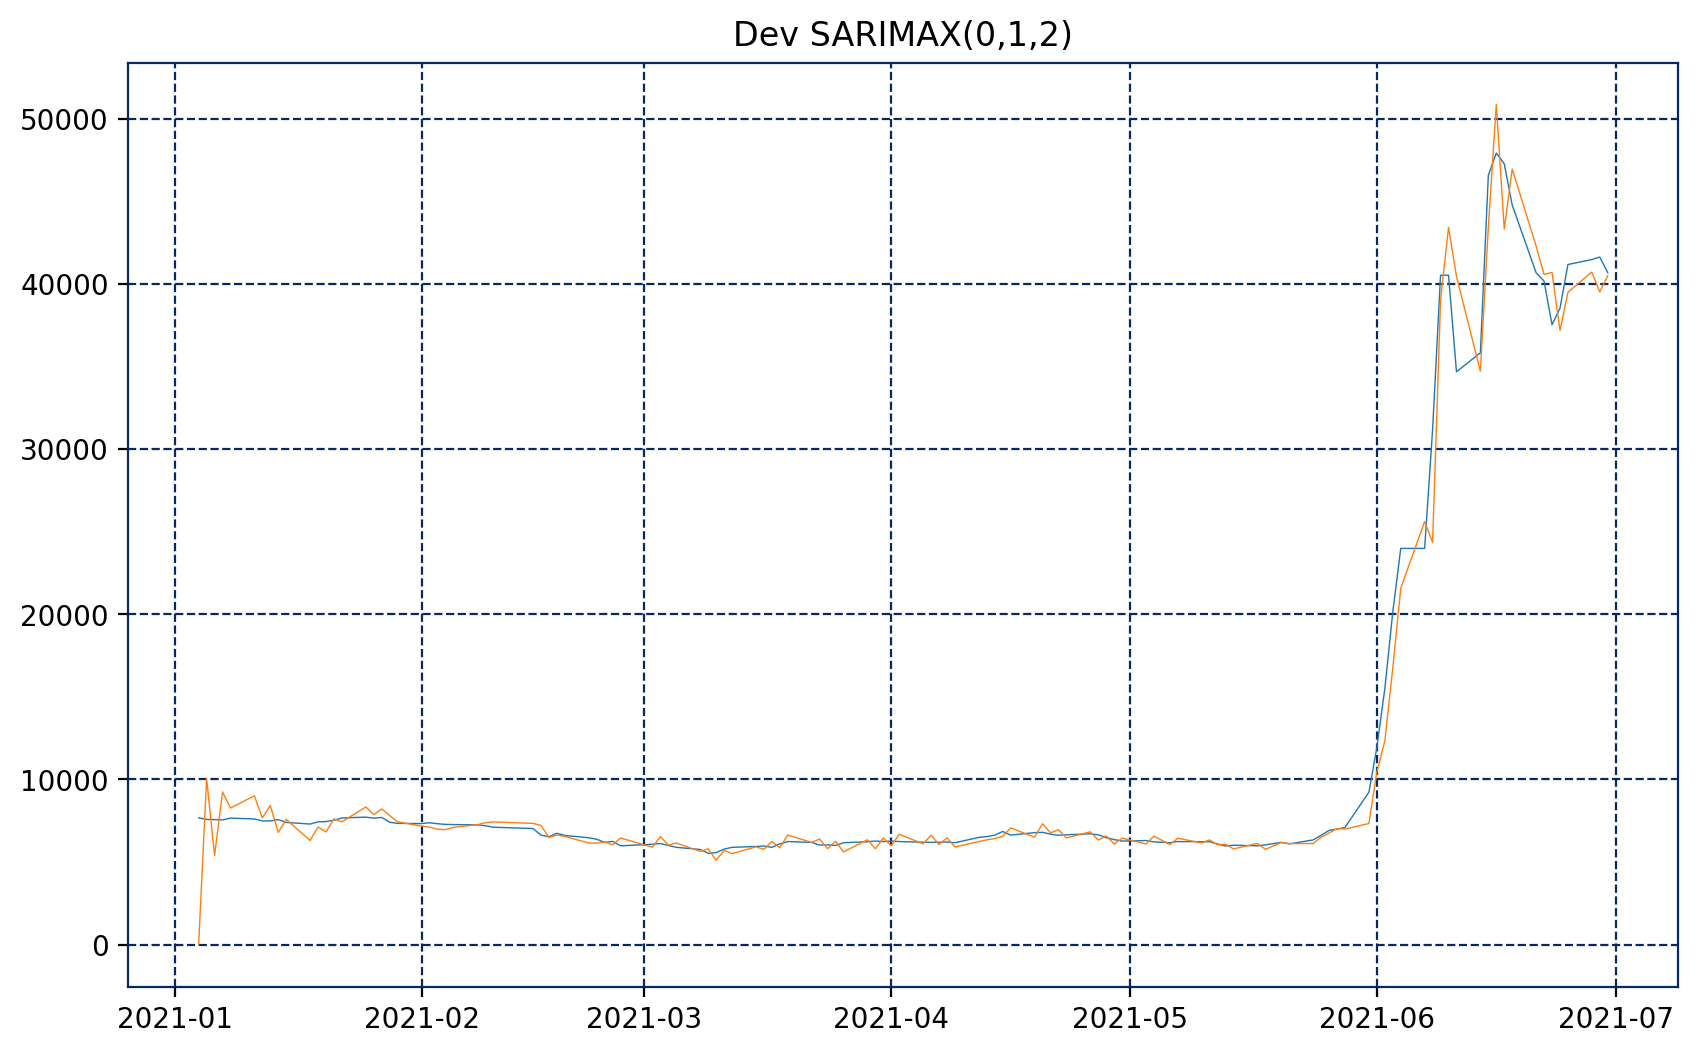

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(df,linewidth=0.5)
plt.plot(fit_auto.fitted,linewidth=0.5)
plt.title('Dev SARIMAX(0,1,2)')
plt.show()

In [ ]:
#향후 10일 주가 예측
fit_auto.predict(n_periods=10)

array([40174.04941617, 40971.46965397, 42433.77153108, 44197.60921121,
       45169.37785174, 45659.68837585, 45907.07690028, 46031.89796572,
       46094.87703241, 46126.65342229])

## LSTM 주가예측

In [ ]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

In [ ]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
class Lstm_Predictor(nn.Module):
  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(Lstm_Predictor, self).__init__()
    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers
    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )
    self.linear = nn.Linear(in_features=n_hidden, out_features=1)
  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )
  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [ ]:
def train_model(model,train_data,train_labels,test_data=None,test_labels=None):
  loss_fn = torch.nn.MSELoss(reduction='sum')
  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 60
  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)
  for t in range(num_epochs):
    model.reset_hidden_state()
    y_pred = model(X_all)
    loss = loss_fn(y_pred.float(), y_all)
    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_all)
        test_loss = loss_fn(y_test_pred.float(), y_all)
      test_hist[t] = test_loss.item()
      if t % 10 == 0:
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')
    train_hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
  return model.eval(), train_hist, test_hist

In [ ]:
# 데이터 변환
df=df_top['Close'] #분석 데이터
scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(df, axis=1))
all_data = scaler.transform(np.expand_dims(df, axis=1))
all_data.shape

(123, 1)

In [ ]:
seq_length = 5
X_all, y_all = create_sequences(all_data, seq_length)
X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()
model = Lstm_Predictor(n_features=1,n_hidden=512,seq_len=seq_length,n_layers=2)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 11.121109008789062
Epoch 10 train loss: 4.257625102996826
Epoch 20 train loss: 3.232571840286255
Epoch 30 train loss: 3.3310368061065674
Epoch 40 train loss: 2.192603349685669
Epoch 50 train loss: 2.0739121437072754


In [ ]:
DAYS_TO_PREDICT = 10
with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [ ]:
predicted_cases = scaler.inverse_transform(
    np.expand_dims(preds, axis=0)
).flatten()

In [ ]:
predicted_index = pd.date_range(start=df.index[-1],periods=DAYS_TO_PREDICT + 1,closed='right')
predicted_cases = pd.Series(data=predicted_cases,index=predicted_index)

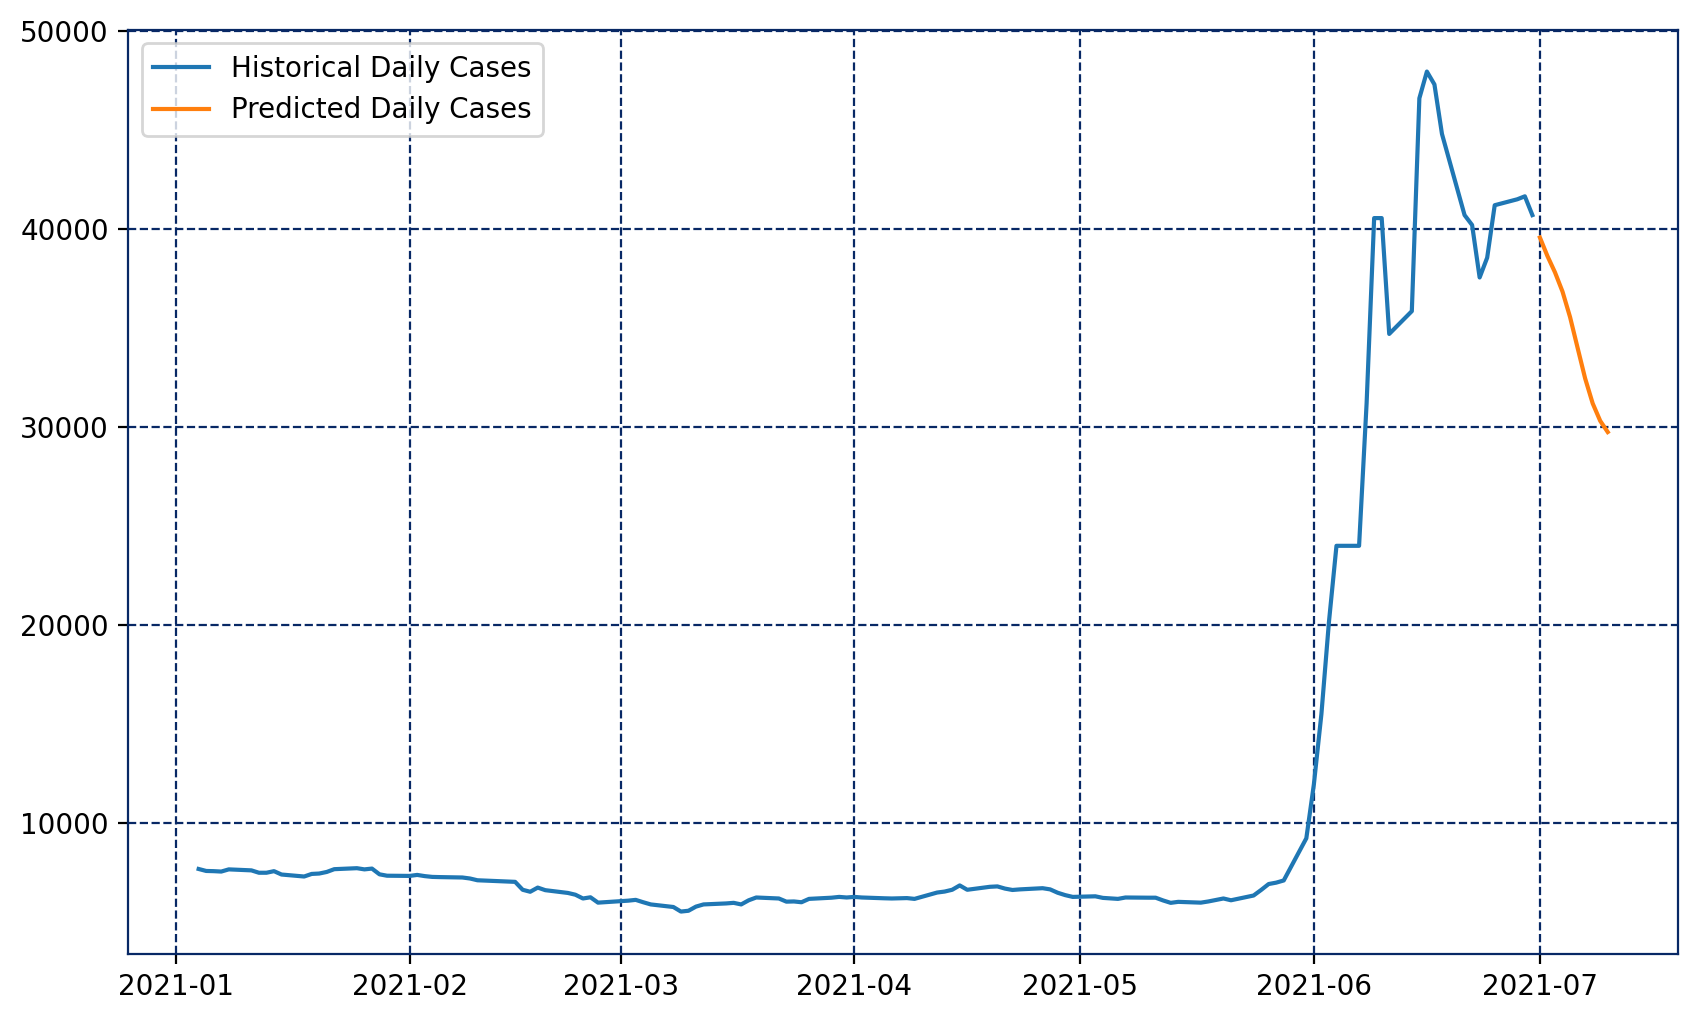

In [ ]:
#분석대상 주가 및 예측주가
plt.plot(df, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

In [ ]:
#향후 10일 예측결과
predicted_cases

2021-07-01    39566.204677
2021-07-02    38630.802243
2021-07-03    37809.007182
2021-07-04    36835.134701
2021-07-05    35549.989849
2021-07-06    33998.204458
2021-07-07    32453.840005
2021-07-08    31194.267685
2021-07-09    30310.103866
2021-07-10    29744.648526
Freq: D, dtype: float64